We reviewed these topics yesterday:
    
- Classification

- Feature vector

- Similarity function (Distance function)

- Inputs (X)

- targets (y)

- Predictions

- Classification Accuracy

- Training Set

- Validation Set

- Nearest Neighbour Search

In [47]:
# Day 2
import numpy as np
import matplotlib.pyplot as plt

In [123]:
# load data
data=np.load('./mnist.npz')

X=data['x_train'].astype(float)
y=data['y_train']

In [124]:
# examine shapes and types
print(X.shape,X.dtype)
print(y.shape,y.dtype)

(60000, 28, 28) float64
(60000,) uint8


In [125]:
print('category 3:',(y==3).sum())
print('category 8:',(y==8).sum())
print('category 3 and 8:',( (y==3) | (y==8) ).sum())


category 3: 6131
category 8: 5851
category 3 and 8: 11982


In [126]:
select= (y==3) | (y==8)
X=X[select,:,:]
y= (y[select]==8)

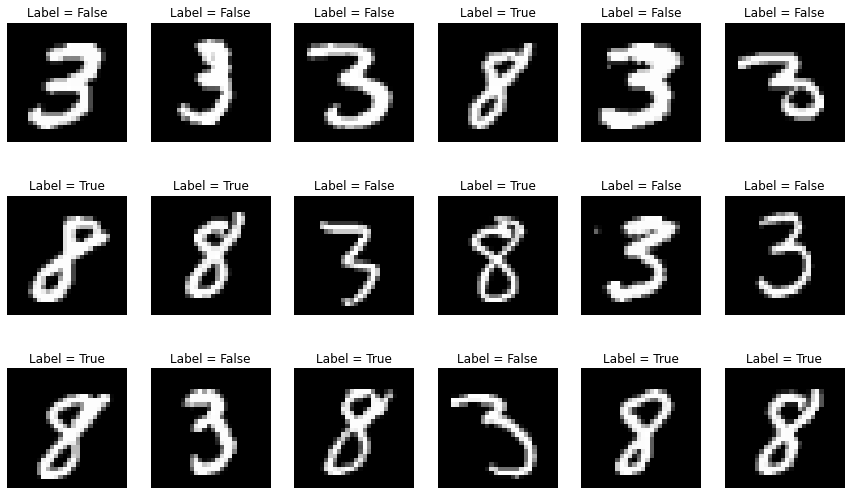

In [127]:
# visualize data
plt.figure(figsize=(15,9))

for i in range(18):
    digit = X[i,:,:]

    plt.subplot(3,6,i+1)    
    plt.imshow(digit, cmap='gray')
    plt.title(f'Label = {y[i]}')
    plt.axis('off')

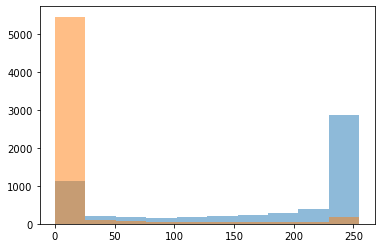

In [142]:
plt.hist(X[ y,17,12],alpha=0.5);
plt.hist(X[~y,17,12],alpha=0.5);

In [138]:
acc=np.zeros( (28,28) )

for i in range(28):
    for j in range(28):
        prediction = X[:,i,j]>128
        acc[i,j]=np.mean(y==prediction)

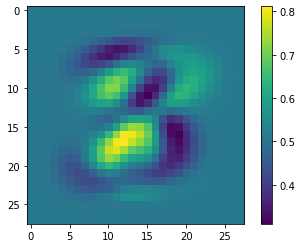

In [141]:
plt.imshow(acc)
plt.colorbar()

In [148]:
prediction = (X[:,17,12]>50)
print(prediction)
print(y)
print(y==prediction)
print((y==prediction).mean())

[False False False ...  True False  True]
[False False False ...  True False  True]
[ True  True  True ...  True  True  True]
0.8405107661492238


In [166]:
Xr=X.reshape(11982,28*28)

In [223]:
Xtrain=Xr[0:200,:]
ytrain=y[0:200]
Xtest =Xr[200:,:]
ytest=y[200:]

In [224]:
from sklearn.linear_model import LinearRegression


model = LinearRegression().fit(Xtrain, ytrain)
y_pred_test  = model.predict(Xtest )
y_pred_train = model.predict(Xtrain)
# print(f'MSE on test set = {mean_squared_error(y, y_pred)}')

# y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]


In [225]:
# plt.hist(y_pred[ ytest],bins=30,alpha=0.5);
# plt.hist(y_pred[~ytest],bins=30,alpha=0.5);

In [226]:
((y_pred_test>0.5)==ytest).mean()

0.8699711424206417

In [227]:
((y_pred_train>0.5)==ytrain).mean()

1.0